<center>
    <img src="https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/Logos/organization_logo/organization_logo.png" width="300" alt="cognitiveclass.ai logo">
</center>


#### Import the required libraries we need for the lab.


In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

#### Read the dataset in the csv file from the URL


In [2]:
boston_df=pd.read_csv('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv')

In [13]:
boston_df.head()

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV,CHAS_cat
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0,Non-adjacent to Charles River
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6,Non-adjacent to Charles River
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7,Non-adjacent to Charles River
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4,Non-adjacent to Charles River
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2,Non-adjacent to Charles River


#### Add your code below following the instructions given in the course to complete the peer graded assignment


### For the "Median value of owner-occupied homes" provide a boxplot

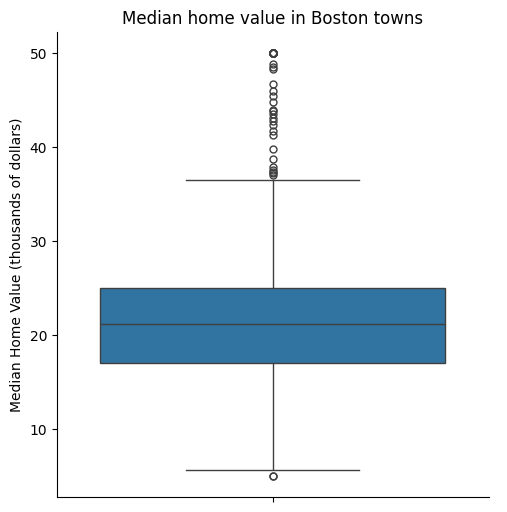

In [69]:
ax = sns.catplot(y=boston_df.MEDV,
            kind='box',
                 ).set( 
    ylabel='Median Home Value (thousands of dollars)',
    title='Median home value in Boston towns',
)
plt.show()

### Provide a  bar plot for the Charles river variable

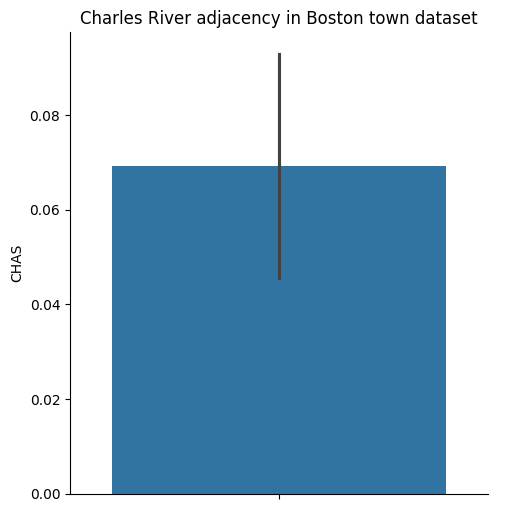

In [68]:
ax = sns.catplot(boston_df,
                 y='CHAS',
                 kind='bar',
                 ).set( 
    title='Charles River adjacency in Boston town dataset',
)
plt.show()

#### alternative plot

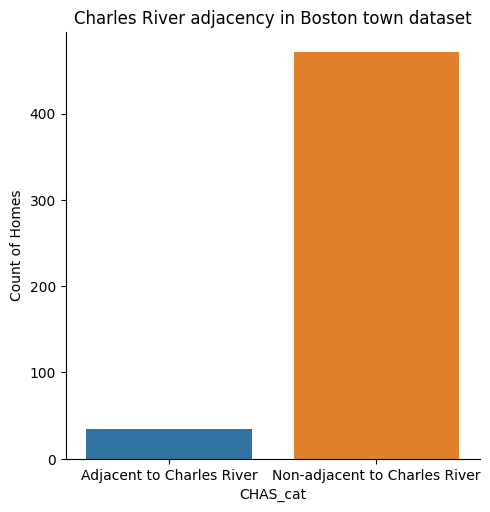

In [67]:

boston_df['CHAS_cat'] = boston_df.CHAS.replace({0.0: 'Non-adjacent to Charles River', 1.0: 'Adjacent to Charles River'})

CHAS_group_df = boston_df.groupby('CHAS_cat').CRIM.count().reset_index()
ax = sns.catplot(CHAS_group_df,
                 x='CHAS_cat',
                 y='CRIM',
                 hue='CHAS_cat',
                 kind='bar',
                 ).set( 
    ylabel='Count of Homes',
    title='Charles River adjacency in Boston town dataset',
)
plt.show()

### Provide a boxplot for the MEDV variable vs the AGE variable. (Discretize the age variable into three groups of 35 years and younger, between 35 and 70 years and 70 years and older)

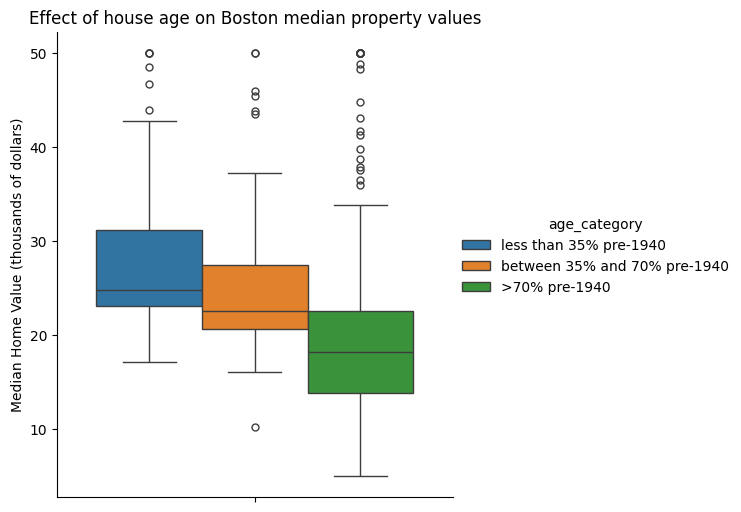

In [64]:
boston_df['age_category'] = pd.cut(
    boston_df.AGE,
    bins=[0, 34.99, 69.99, 200],
    labels=['less than 35% pre-1940', 'between 35% and 70% pre-1940', '>70% pre-1940']
)

ax = sns.catplot(
    boston_df,
    y='MEDV',
    hue='age_category',
    kind='box',
).set(
    ylabel='Median Home Value (thousands of dollars)',
    title='Effect of house age on Boston median property values',
)

### Provide a scatter plot to show the relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town. What can you say about the relationship?

#### plot

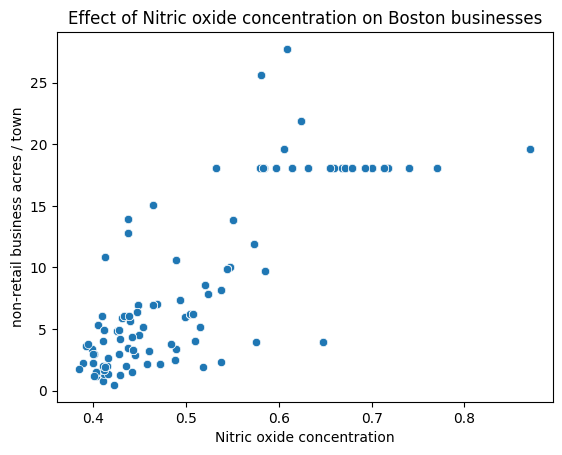

In [62]:
ax = sns.scatterplot(
    boston_df,
    x='NOX',
    y='INDUS',
).set(
    xlabel='Nitric oxide concentration',
    ylabel='non-retail business acres / town',
    title='Effect of Nitric oxide concentration on Boston businesses',
)
plt.show()

#### model

In [43]:
X = sm.add_constant(boston_df.NOX)
y = boston_df.INDUS
model = sm.OLS(y, X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  INDUS   R-squared:                       0.583
Model:                            OLS   Adj. R-squared:                  0.582
Method:                 Least Squares   F-statistic:                     705.1
Date:                Tue, 17 Jun 2025   Prob (F-statistic):           7.91e-98
Time:                        15:33:09   Log-Likelihood:                -1470.5
No. Observations:                 506   AIC:                             2945.
Df Residuals:                     504   BIC:                             2954.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -13.9414      0.965    -14.450      0.000     -15.837     -12.046
NOX           45.2108      1.703     26.554      0.000      41.866      48.556
==============================================================================
Omnibus:                       46.050   Durbin-Watson:                   0.272
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               67.622
Skew:                           0.649   Prob(JB):                     2.07e-15
Kurtosis:                       4.233   Cond. No.                         11.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### conclusion
There is a positive correlation between the Nitric oxide concentrations and the proportion of non-retail business acres per town.

### Create a histogram for the pupil to teacher ratio variable

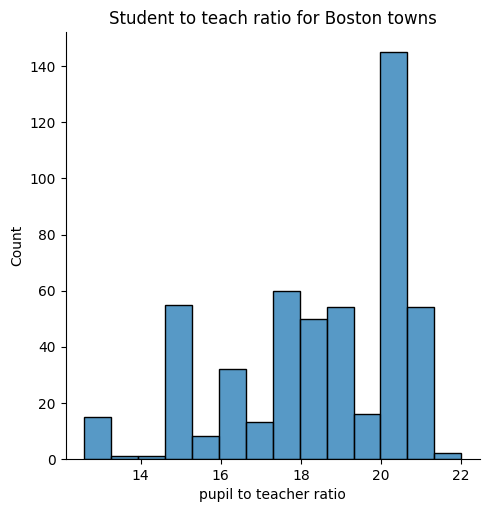

In [61]:
ax = sns.displot(
    boston_df,
    x='PTRATIO',
).set(
    xlabel='pupil to teacher ratio',
    title='Student to teach ratio for Boston towns',
)
plt.show()

# Statistical tests

## Is there a significant difference in median value of houses bounded by the Charles river or not? (T-test for independent samples)
#### Null Hypothesis: There is not a signficiant difference in the median value of houses between those bounded and unbounded by the Charles River

In [49]:
scipy.stats.ttest_ind(
    boston_df[boston_df.CHAS==0].MEDV,
    boston_df[boston_df.CHAS==1].MEDV,
)

TtestResult(statistic=np.float64(-3.996437466090509), pvalue=np.float64(7.390623170519905e-05), df=np.float64(504.0))

### conclusions
The p-value for the T-test is less than 0.05, so we reject the null hypothesis and conclude that there is a significant difference between the value of houses bounded or unbounded by the Charles River

## Is there a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)? (ANOVA)
#### Null Hypothesis: there is no difference between the median home value between towns with less than 35%, between 35% and 70%, or >70% pre-1940's homes

In [56]:
scipy.stats.f_oneway(
    boston_df[boston_df.age_category=='less than 35% pre-1940'].MEDV,
    boston_df[boston_df.age_category=='between 35% and 70% pre-1940'].MEDV,
    boston_df[boston_df.age_category=='>70% pre-1940'].MEDV
)

F_onewayResult(statistic=np.float64(36.40764999196599), pvalue=np.float64(1.7105011022702984e-15))

### conclusions
The p-value for the ANOVA test is less than 0.05, so we reject the null hypothesis and conclude that there is a significant difference between the value of houses based on the proportion of homes built before 1940

## Can we conclude that there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town? (Pearson Correlation)
#### Null Hypothesis: there is no relationship between the between Nitric oxide concentrations and proportion of non-retail business acres per town

In [57]:
scipy.stats.pearsonr(
    boston_df.NOX,
    boston_df.INDUS
)

PearsonRResult(statistic=np.float64(0.763651446920915), pvalue=np.float64(7.913361061241263e-98))

### conclusions
The p-value for the Pearson correlation test is less than 0.05, so we reject the null hypothesis and conclude that there is a significant relationship between the Nitric oxide concentrations and proportion of non-retail business acres per town

## What is the impact of an additional weighted distance  to the five Boston employment centres on the median value of owner occupied homes? (Regression analysis)
#### Null Hypothesis: there is no relationship between the weighted distance to the five Boston employment centres on the median value of owner occupied homes

In [58]:
X = sm.add_constant(boston_df.DIS)
y = boston_df.MEDV

model = sm.OLS(y, X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Tue, 17 Jun 2025   Prob (F-statistic):           1.21e-08
Time:                        16:03:25   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.000      16.784      19.996
DIS            1.0916      0.188      5.795      0.000       0.722       1.462
==============================================================================
Omnibus:                      139.779   Durbin-Watson:                   0.570
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              305.104
Skew:                           1.466   Prob(JB):                     5.59e-67
Kurtosis:                       5.424   Cond. No.                         9.32
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### conclusions
The p-value is less than 0.05, so we reject the null hypothesis and conclude that there is a significant relationship between the weighted distance to the five Boston employment centres on the median value of owner occupied homes

There is a weak correlation coefficient of ~0.25, but on average the median home value increases ~$90 per unit of weighted distance (unspecified)